In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn import manifold
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image, display_png
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
sns.set()

<h1> Objective </h1>
<blockquote>
    
Use K-Means clustering to cluster whisky distilleries by their tasting profile. Use the elbow or silhouette method to find the optimal number of clusters.
    
</blockquote>

<h2> Loading in dataset </h2>


In [2]:
whiskey_df = pd.read_csv('data/whisky.csv')

<h2> Examining the dataset </h2>


In [3]:
whiskey_df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


<blockquote>
    From the above table we can see that we are given different attributes related to taste(body, sweetness, smoky, medicinal, tabacco, honey, picy, winey, nutty, malty, fruity, floral) and the location at which it's made. I will use these features to identify the simiarities between these whiskeys and place them in clusters.
    </blockquote>

In [4]:
whiskey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [5]:
whiskey_df.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [6]:
whiskey_df.isnull().sum()

RowID         0
Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
Postcode      0
Latitude      0
Longitude     0
dtype: int64

<h2> Data Processing </h2>


In [7]:
whiskey_df.drop(['RowID',],inplace=True,axis=1)

In [8]:
whiskey_df.columns

Index(['Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral',
       'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

<h2> Feature Selection </h2>


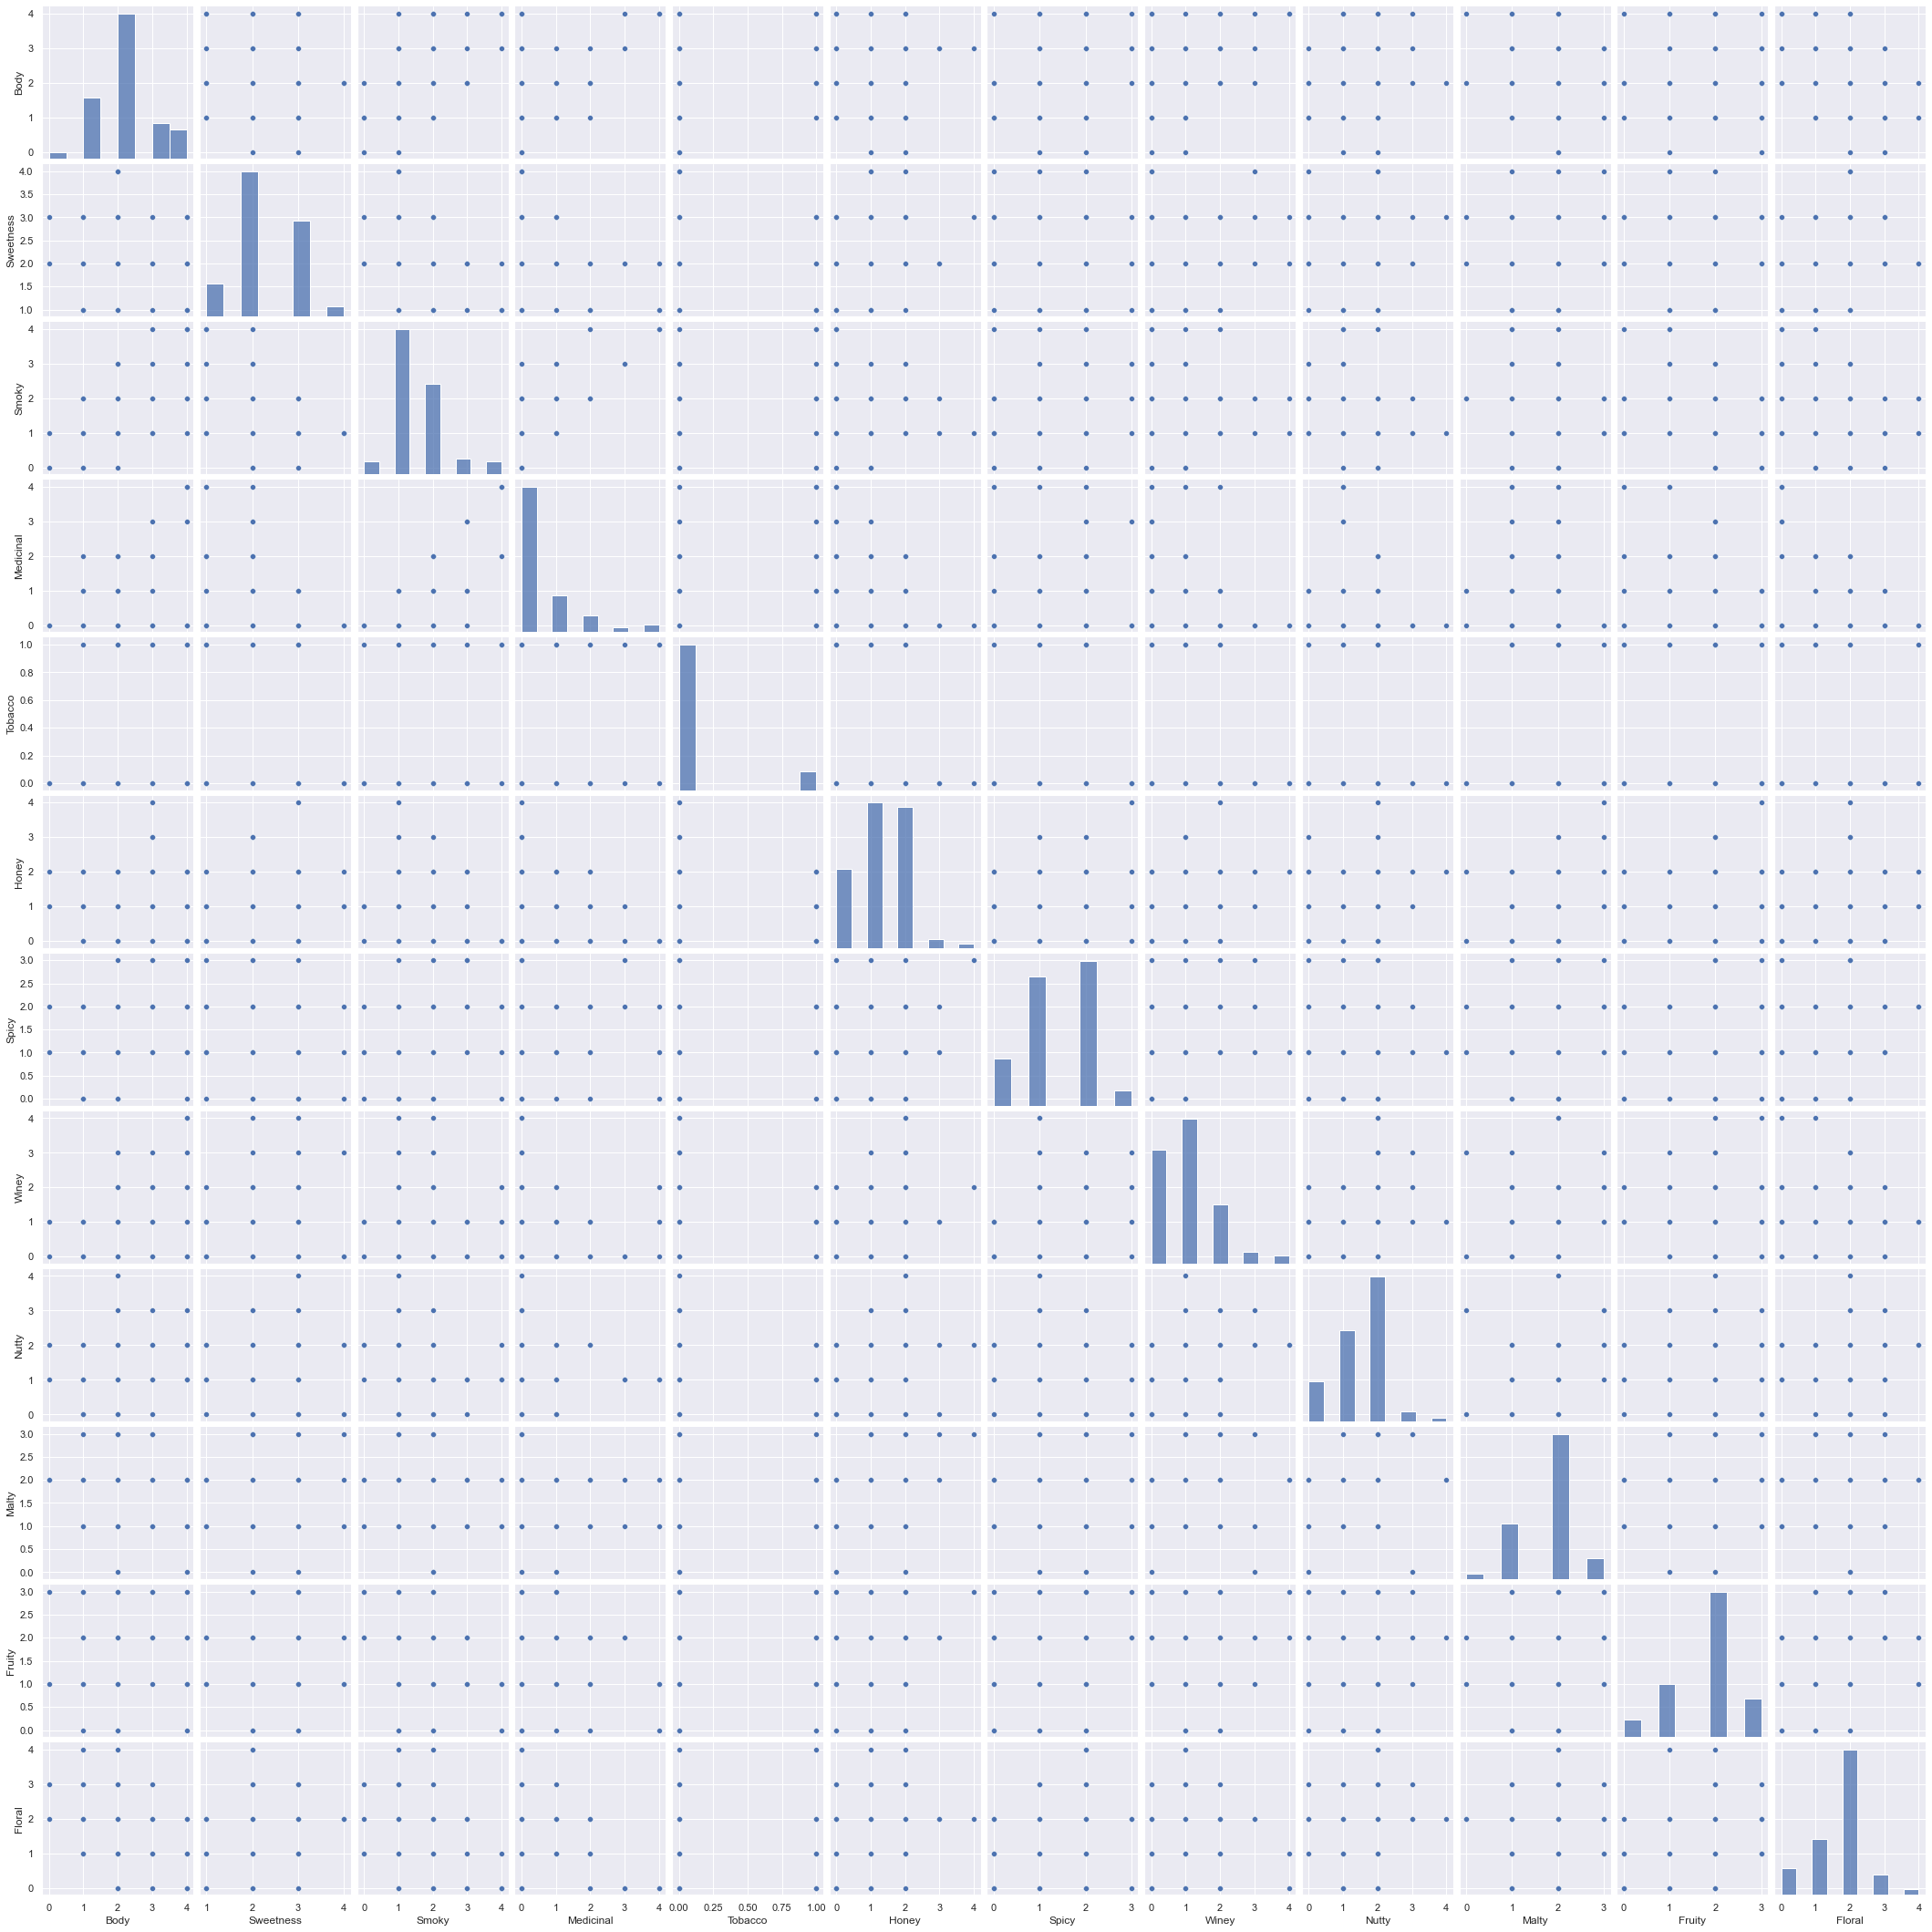

In [9]:
sns.pairplot(whiskey_df[['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']], palette="husl")

<blockquote>
    Looking at all og the above features we can see that all the features are forming approximately 4-5 clusters. There aren't any features that aren't forming clear clusters or have overlapping data points. So I think it would be safe to say thay we can use all the features for modelling. 
    </blockquote>

In [10]:
X = whiskey_df[['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 
                'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']].values

In [11]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

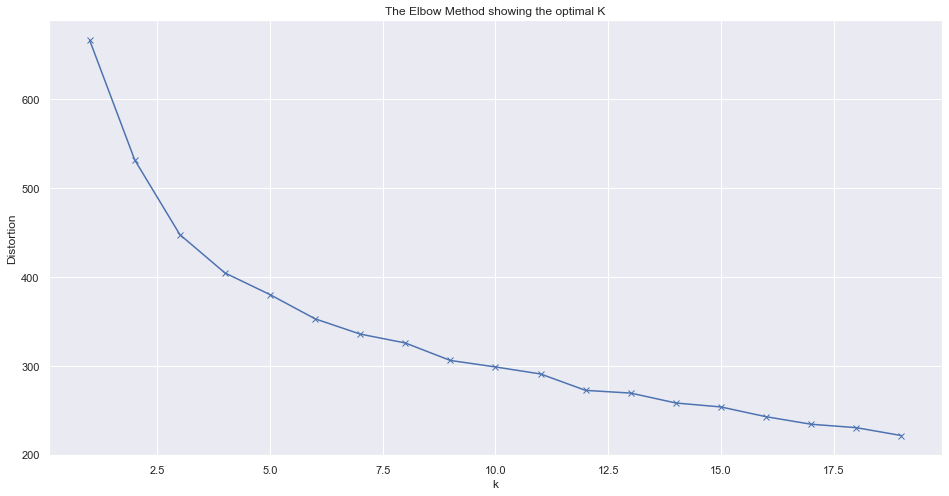

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

<blockquote>
After looking at the EDA and optimal numbers of k. The optimal number of clusters to choose is 5 clusters
    </blockquote>

In [13]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans

KMeans(n_clusters=5, random_state=1)

In [14]:
kmodel = kmeans.fit_predict(X)


In [15]:
whiskey_df['class'] = kmodel
whiskey_df['class'].value_counts()

1    24
3    21
0    21
4    14
2     6
Name: class, dtype: int64

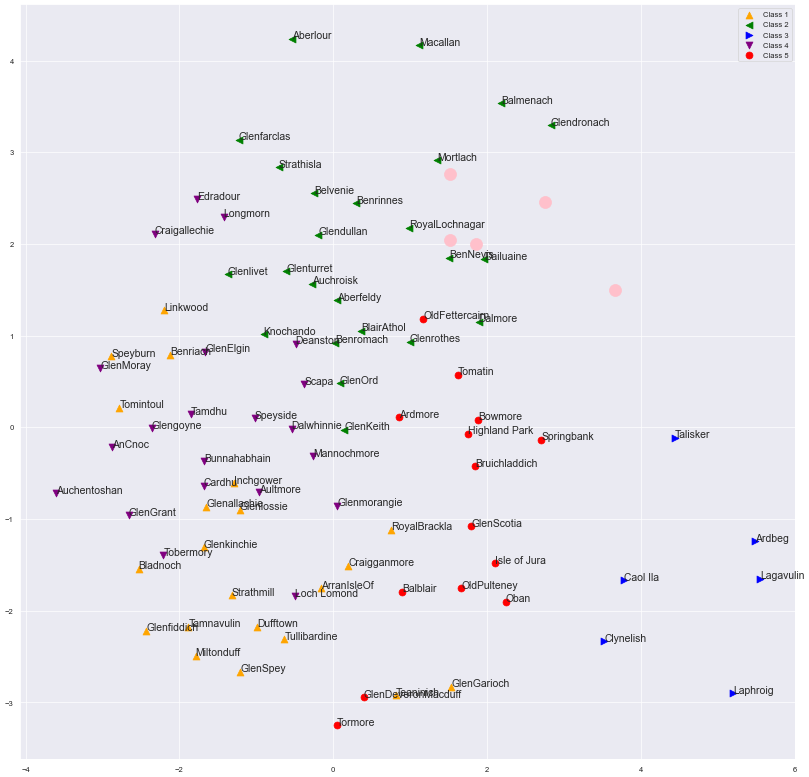

In [16]:
mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=0)
pos = mds.fit_transform(X)

col =['orange','green', 'blue', 'purple', 'red']
chars = "^<>vo+d"
c_flag = 0
labels = whiskey_df['Distillery']

plt.figure(figsize=(20, 20), dpi=50)
plt.rcParams["font.size"] = 15

for label, x, y, c in zip(labels, pos[:, 0], pos[:, 1],whiskey_df['class']):

    if(c == c_flag):
        c_flag = c_flag+1
        plt.scatter(x,y, c=col[c], marker=chars[c], s=100, label = "Class "+ str(c+1))
    else:
        plt.scatter(x,y, c=col[c], marker=chars[c], s=100)
        
    plt.annotate(label,xy = (x, y))
plt.legend(loc='upper right')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink')
plt.show()

In [17]:
whiskey_df.query('Distillery == "GlenSpey" or Distillery == "Miltonduff"')

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,class
40,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,0
64,Miltonduff,2,4,1,0,0,1,0,0,2,1,1,2,IV30 3TQ,322640,861040,0


In [18]:
whiskey_df.query('Distillery == "GlenSpey" or Distillery == "Glendronach"')

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,class
40,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,0
42,Glendronach,4,2,2,0,0,2,1,4,2,2,2,0,AB54 6DA,361200,844930,1


<h2> Decision Tree </h2>
<blockquote>
    I'll be using a decision tree to identify the main differences between each cluster.
    </blockquote>

In [19]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state =1, min_samples_leaf=5)

X_train = X
y_train = whiskey_df['class']

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image, display_png
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn import manifold
import folium
from pyproj import Proj, transform

In [45]:
dot_data = export_graphviz(tree, filled = True, rounded = True, class_names = ['Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5'],
                          feature_names = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 
                'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'], out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
display_png(Image('tree.png'))

InvocationException: GraphViz's executables not found

<blockquote>
    Looking at all og the above features we can see that all the features are forming approximately 4-5 clusters. There aren't any features that aren't forming clear clusters or have overlapping data points. So I think it would be safe to say thay we can use all the features for modelling. 
    </blockquote>

In [43]:
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 
                'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found

<blockquote>
    Looking at all og the above features we can see that all the features are forming approximately 4-5 clusters. There aren't any features that aren't forming clear clusters or have overlapping data points. So I think it would be safe to say thay we can use all the features for modelling. 
    </blockquote>